
# SPXW Dataset Demo

This quick notebook shows how to use `volkit.datasets.spxw` and its feature flags.

**What you'll see:**
- Load defaults and inspect a tiny sample
- Toggle column groups (`include_*` flags)
- Filter by days-to-expiry (`D`)
- Apply a volume filter (`min_volume`)
- Point to a custom CSV via `data_path`

> Tip: Keep outputs compact – we only show heads or small summaries so it's easy to follow.


In [10]:

from volkit.datasets import spxw
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 50)



## 1. Load with defaults

By default we include dates, underlying (F), quotes (C/P bid/ask) and volumes.


In [11]:

df = spxw()
print("Rows:", len(df))
df.head(8)


Rows: 5192


,K,D,T,quote_date,expiration_date,F_bid,F_ask,C_bid,C_ask,P_bid,P_ask,C_vol,P_vol
0,1700,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,1209.1,1229.2,0.0,0.05,0,0
1,1800,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,1109.1,1129.2,0.0,0.05,0,0
2,1850,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,1059.1,1079.2,0.0,0.05,0,0
3,1900,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,1009.1,1029.2,0.0,0.05,0,0
4,1950,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,959.1,979.2,0.0,0.05,0,0
5,2000,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,915.5,920.8,0.0,0.05,0,0
6,2050,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,865.6,870.7,0.0,0.05,0,0
7,2100,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,815.5,820.8,0.0,0.05,0,0



## 2. Column groups (flags)

Use the `include_*` flags to pick just the columns you want.


In [12]:

df_min = spxw(include_dates=False, include_underlying=False,
              include_quotes=False, include_sizes=False,
              include_open_interest=False, include_volumes=False)
print("Minimal schema:", list(df_min.columns))
df_min.head(6)


Minimal schema: ['K', 'D', 'T']


,K,D,T
0,1700,0,0.0
1,1800,0,0.0
2,1850,0,0.0
3,1900,0,0.0
4,1950,0,0.0
5,2000,0,0.0


In [13]:

df_quotes = spxw(include_dates=False, include_underlying=False,
                 include_quotes=True, include_sizes=False,
                 include_open_interest=False, include_volumes=False)
print("Quotes-only schema:", list(df_quotes.columns))
df_quotes.head(6)


Quotes-only schema: ['K', 'D', 'T', 'C_bid', 'C_ask', 'P_bid', 'P_ask']


,K,D,T,C_bid,C_ask,P_bid,P_ask
0,1700,0,0.0,1209.1,1229.2,0.0,0.05
1,1800,0,0.0,1109.1,1129.2,0.0,0.05
2,1850,0,0.0,1059.1,1079.2,0.0,0.05
3,1900,0,0.0,1009.1,1029.2,0.0,0.05
4,1950,0,0.0,959.1,979.2,0.0,0.05
5,2000,0,0.0,915.5,920.8,0.0,0.05


In [14]:

df_sizes_oi = spxw(include_dates=False, include_underlying=False,
                   include_quotes=False, include_sizes=True,
                   include_open_interest=True, include_volumes=False)
print("Sizes + OI schema:", list(df_sizes_oi.columns))
df_sizes_oi.head(6)


Sizes + OI schema: ['K', 'D', 'T', 'C_bid_size', 'C_ask_size', 'P_bid_size', 'P_ask_size', 'C_oi', 'P_oi']


,K,D,T,C_bid_size,C_ask_size,P_bid_size,P_ask_size,C_oi,P_oi
0,1700,0,0.0,78,78,0,1699,0,24
1,1800,0,0.0,78,78,0,5956,0,4333
2,1850,0,0.0,78,78,0,7956,0,11328
3,1900,0,0.0,79,79,0,5067,20,3240
4,1950,0,0.0,78,78,0,2084,0,382
5,2000,0,0.0,10,10,0,2451,7,705



## 3. Filter by days-to-expiry `D`

First, discover which `D` values are present, then load a single-tenor slice.


In [15]:

df_all = spxw()
unique_D = sorted(df_all["D"].unique().tolist())
print("Available D values:", unique_D[:10], "..." if len(unique_D) > 10 else "")
some_D = unique_D[0]
df_D = spxw(D=some_D)
print(f"Rows with D={some_D}:", len(df_D))
df_D[['K','C_bid','C_ask','P_bid','P_ask']].head(8)


Available D values: [0, 2, 5, 7, 9, 12, 14, 16, 19, 21] ...
Rows with D=0: 161


,K,C_bid,C_ask,P_bid,P_ask
0,1700,1209.1,1229.2,0.0,0.05
1,1800,1109.1,1129.2,0.0,0.05
2,1850,1059.1,1079.2,0.0,0.05
3,1900,1009.1,1029.2,0.0,0.05
4,1950,959.1,979.2,0.0,0.05
5,2000,915.5,920.8,0.0,0.05
6,2050,865.6,870.7,0.0,0.05
7,2100,815.5,820.8,0.0,0.05


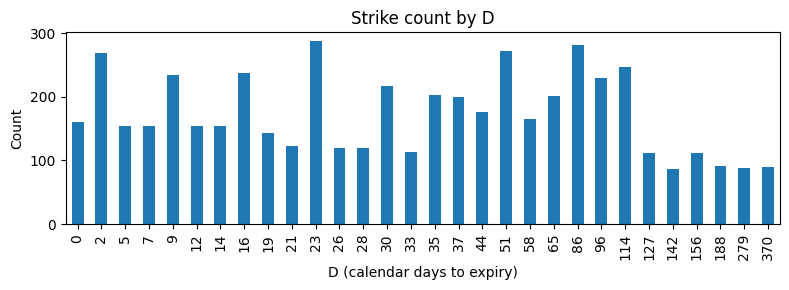

In [16]:

# Tiny visualization: strikes per D (compact)
counts = df_all.groupby('D')['K'].count().sort_index()
counts.plot(kind='bar', figsize=(8,3))
plt.title("Strike count by D")
plt.xlabel("D (calendar days to expiry)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



## 4. Volume filter (`min_volume`)

Keep only strikes where **both** call and put have at least `min_volume` trades.


In [17]:

df_v0 = spxw(min_volume=0)
df_v100 = spxw(min_volume=100)
print("Rows (no volume filter):", len(df_v0))
print("Rows (min_volume=100):  ", len(df_v100))
df_v100.head(6)


Rows (no volume filter): 5192
Rows (min_volume=100):   66


,K,D,T,quote_date,expiration_date,F_bid,F_ask,C_bid,C_ask,P_bid,P_ask,C_vol,P_vol
0,2875,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,40.8,45.5,0.0,0.05,2943,4374
1,2880,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,36.0,40.4,0.0,0.05,127,2145
2,2885,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,30.8,35.5,0.0,0.05,300,4283
3,2890,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,25.8,30.5,0.0,0.05,121,4415
4,2895,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,20.8,25.5,0.0,0.05,230,5566
5,2900,0,0.0,2019-06-26,2019-06-26,2917.8,2918.42,15.8,20.5,0.0,0.05,180,12184
